In [1]:
import numpy as np   ## importing all the libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy.stats import mode

In [2]:
dataset= pd.read_csv('E:/studymaterial/hareeshsir/New folder/knn/Social_Network_Ads.csv') # uploading the dataframe to the'dataset'
dataset.head() # returns the headings of the table along with first 5 entries

,UserID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,Not Purchased
1,15810944,Male,35,20000,Not Purchased
2,15668575,Female,26,43000,Not Purchased
3,15603246,Female,27,57000,Not Purchased
4,15804002,Male,19,76000,Not Purchased


In [3]:
dataset=dataset.drop('UserID',axis=1) # removes the column with heading'userid'
dataset=dataset.drop('Gender',axis=1) # removes the column with heading 'gender'
dataset.head() # returns the updates headings of the tables

,Age,EstimatedSalary,Purchased
0,19,19000,Not Purchased
1,35,20000,Not Purchased
2,26,43000,Not Purchased
3,27,57000,Not Purchased
4,19,76000,Not Purchased


In [4]:
X=dataset.drop('Purchased',axis=1) #from the updated dataframe 'purchased' column is removed and saved in X
Y= dataset['Purchased'] # column purchased is saved in Y
X
Y

0      Not Purchased
1      Not Purchased
2      Not Purchased
3      Not Purchased
4      Not Purchased
           ...      
395        Purchased
396        Purchased
397        Purchased
398    Not Purchased
399        Purchased
Name: Purchased, Length: 400, dtype: object

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

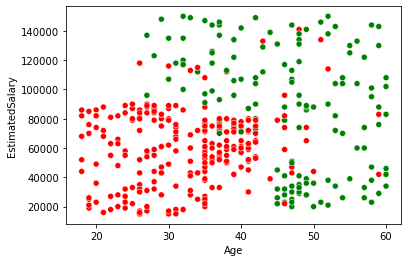

In [5]:
color = ['green' if x== 'Purchased' else 'red' for x in dataset['Purchased'] ]
sns.scatterplot(x=dataset['Age'],y=dataset['EstimatedSalary'], c = color)  
##scatter plots purchased and not purchased points with x axis as age and y axis as estimated salary

In [6]:
### Splitting of data
n_train = math.floor(0.8 * X.shape[0])
###0.8 times the total length of X is taken for the training data
n_test = math.ceil(0.2 * X.shape[0])## 0.2times for the test data
X_train = X[:n_train] # splits the X for training data
Y_train = Y[:n_train] ## splits the Y data for training data
X_test = X[n_train:] ## remianing X is taken as test
Y_test = Y[n_train:]## remaining Y is taken as test
print("Total Number of rows in train:",X_train.shape[0])## returns the no of training data
print("Total Number of rows in test",X_test.shape[0])## returns the number of test data

Total Number of rows in train: 320
Total Number of rows in test 80


In [7]:
def euclidean(pt1,pt2):  ### defining the function for finding the eucliadean distance between point pt1 and pt2
    distance=np.sqrt(np.sum(pt1-pt2)**2) 
    return distance

In [8]:
def KNN(X_train,X_test,Y,k_value): ## defining the function to find the KNN 
    
    y_hat=[]  ## list to store the values of the predictions
    
    arr = X_test.to_numpy() ## converts the X_test data to an array
    
    for test_pt in arr : ### loops through each point in the test data
        
        dist=[]  ## array to store the euclidean distances of each point
            
        
    
        for j in range(len(X_train)): ## loops thrpugh the entire length of the train data
            
            
            distances = euclidean(np.array(X_train.iloc[j]),test_pt) ## calling the euclidean distance function 
            dist.append(distances) ## appends the euclidean distance values
        dist=np.array(dist) 
        
        
        distance=[]
        distance = np.argsort(dist)[:k_value] ###Sorting the array keeping the first K datapoints
        
        labels=Y[distance]
        count=mode(labels).mode[0] ##finds the most repeated values
        y_hat.append(count)
        
    return y_hat

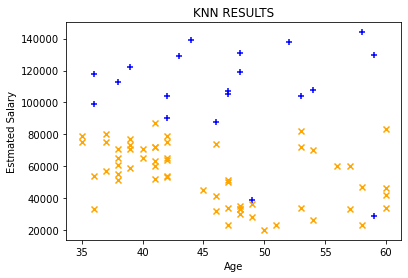

In [9]:
y_hat_test= KNN(X_train,X_test,Y,k_value=5)  ## implementing the function for k value=5

for i in range (len(y_hat_test)):
    if (y_hat_test[i]=='Purchased'):
        plt.scatter(X_test.iloc[i]['Age'],X_test.iloc[i]['EstimatedSalary'], color='blue',marker="+")  ##plotting the 'purchased' prediction
        
    else :
               
        
        plt.scatter(X_test.iloc[i]['Age'],X_test.iloc[i]['EstimatedSalary'], color='orange',marker="x")# plotting not purchased prediction
        
plt.xlabel('Age') ## x axis label
plt.ylabel('Estmated Salary') # yaxis label
plt.title('KNN RESULTS') # plot title
plt.show() ## displays the figure


KNN ALGORITHM USING SKLEARN

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import confusion_matrix

In [11]:
dataset= pd.read_csv('E:/studymaterial/hareeshsir/New folder/knn/Social_Network_Ads.csv')
dataset.head()

,UserID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,Not Purchased
1,15810944,Male,35,20000,Not Purchased
2,15668575,Female,26,43000,Not Purchased
3,15603246,Female,27,57000,Not Purchased
4,15804002,Male,19,76000,Not Purchased


In [12]:
dataset=dataset.drop('UserID',axis=1)
dataset=dataset.drop('Gender',axis=1)
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,Not Purchased
1,35,20000,Not Purchased
2,26,43000,Not Purchased
3,27,57000,Not Purchased
4,19,76000,Not Purchased


In [13]:
X=dataset.drop('Purchased',axis=1)
Y= dataset['Purchased']
X
Y

0      Not Purchased
1      Not Purchased
2      Not Purchased
3      Not Purchased
4      Not Purchased
           ...      
395        Purchased
396        Purchased
397        Purchased
398    Not Purchased
399        Purchased
Name: Purchased, Length: 400, dtype: object

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

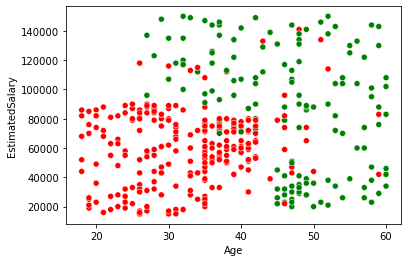

In [14]:
color = ['green' if x== 'Purchased' else 'red' for x in dataset['Purchased'] ]
sns.scatterplot(x=dataset['Age'],y=dataset['EstimatedSalary'], c = color)

In [15]:
## splits the data into train and test data using the builtin function with test data size as 20% of total data size

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)  

In [16]:
knn = KNeighborsClassifier(n_neighbors=5) ##calling the KNN function for k value=5

In [17]:
knn.fit(X_train,Y_train) ##it learns or stores the dataset in memory

KNeighborsClassifier()

In [18]:
knn.score(X_test,Y_test)  ## calculates the accuracy

0.8375

In [19]:
y_pred = knn.predict(X_test) 
cm=confusion_matrix(Y_test,y_pred)
cm

array([[52,  6],
       [ 7, 15]], dtype=int64)

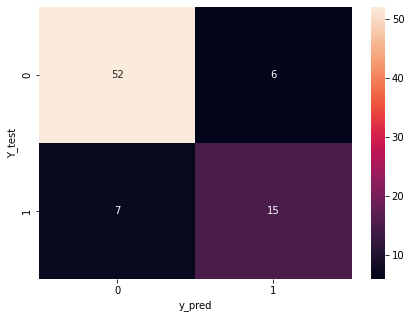

In [20]:
#cm vizualization

import seaborn as sns 
f, ax =plt.subplots(figsize = (7,5))

sns.heatmap(cm,annot = True)
plt.xlabel("y_pred")
plt.ylabel("Y_test")
plt.show()